---

_You are currently looking at **version 0.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the Jupyter Notebook FAQ course resource._

---

In [1]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `assets/fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [11]:
def answer_one():
    # YOUR CODE HERE
    df = pd.read_csv('assets/fraud_data.csv')
    X = df.iloc[:,:-1]
    y = df.iloc[:,-1]
    
    return sum(y==1)/len(y)
    raise NotImplementedError()


In [2]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('assets/fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [ ]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score,accuracy_score

    # YOUR CODE HERE
    dummy_majority=DummyClassifier(strategy='most_frequent').fit(X_train,y_train)
    y_predict=dummy_majority.predict(X_test)
    accuracy=accuracy_score(y_test,y_predict)
    recall=recall_score(y_test,y_predict)
    
    return (accuracy,recall)
    raise NotImplementedError()

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [18]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score, accuracy_score
    from sklearn.svm import SVC
    
    # YOUR CODE HERE
    model=SVC().fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return (accuracy,recall,precision)
    raise NotImplementedError()

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [30]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
    
    # YOUR CODE HERE
    model=SVC(C=1e9, gamma=1e-07).fit(X_train,y_train)
    y_score=model.decision_function(X_test)
    
    y_pred=[]
    for i in range(len(y_score)):
        if y_score[i]<-220:
            y_pred.append(0)
        else:
            y_pred.append(1)
    
    cm=confusion_matrix(y_test,y_pred)
    
    return cm
    raise NotImplementedError()

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

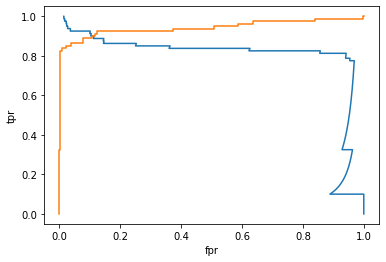

In [64]:
# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve
import matplotlib.pyplot as plt

model_lr=LogisticRegression().fit(X_train, y_train)
y_prob = model_lr.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_prob[:,1])
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')

from sklearn import metrics
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')

fpr=np.round(fpr,2)

def answer_five():
    re=recall[np.where(precision==0.75)[0][0]]
    true_pr=tpr[np.where(fpr==0.13)[0][1]]
    return (re,true_pr)
#raise NotImplementedError()

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation. (Suggest to use `solver='liblinear'`, more explanation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html))

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|

<br>

*This function should return a 4 by 2 numpy array with 8 floats.* 

*Note: do not return a DataFrame, just the values denoted by `?` in a numpy array.*

In [78]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    # YOUR CODE HERE 
    lr=LogisticRegression(solver='liblinear')
    grid_values = {'C':[0.01, 0.1, 1, 10],'penalty': ['l1', 'l2'],}
    grid_lr=GridSearchCV(lr,param_grid=grid_values,scoring='recall',cv=3)
    grid_lr.fit(X_train, y_train)
    
    mean_score=grid_lr.cv_results_['mean_test_score'].reshape(4,2)
    
    return mean_score
    raise NotImplementedError()

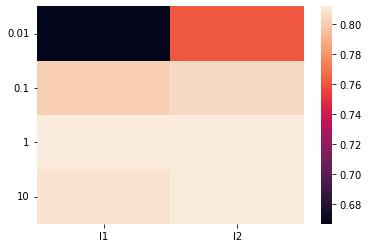

In [81]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure()
    sns.heatmap(scores, xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())